<img src="logo_img/logo.png" height=50 width=50 align="right"/><br/><br/>



# IST 5520: Data Science and ML in Python
## Project Report: Group 4 

<h3>Group Members:&nbsp;<font size=3><i>Sayantan Majumdar, Dawit Wolday Asfaw, Cong Shen, Divya Reddy Manku, Akhil Reddy Annreddy </i></font></h3> 




# 1. Introduction

## 1.1 Background
Greenhouse gases (GHG) are responsible for trapping heat, thereby making the planet warmer. For the past 150 years, the sharp global increase in GHG in the atmosphere can be primarily attributed to anthropogenic or human-induced activities. In the United States, the largest source of GHG emissions from human activities includes fossil fuel burning, which acts as the predominant energy source in the transportation sector and is also used to generate electricity and heat. The transportation sector generates the largest share of GHG emissions (29% of 2019 GHG emissions) from burning fossil fuels (mostly petroleum by-products such as gasoline and diesel) for our cars, trucks, ships, trains, and planes.


The Environmental Protection Agency (EPA) emissions score (smog rating) reflects vehicle tailpipe emissions (CO$_2$) that contribute to local and regional air pollution, creating problems such as smog, haze, and health issues. CO$_2$ emissions typically constitute 99% of the tailpipe emissions of greenhouse gases. Essentially, the higher the rating, the cleaner the car is, and this rating is a direct proxy for the CO$_2$ emissions.  

## 1.2 Problem Description and Research Questions
This project aims to build a machine learning model to predict the EPA emission score from different vehicles operating in the United States. Essentially, this is a classification problem wherein we will utilize the EPA vehicle and emission data sets to predict the EPA emission score (a discrete quantity). We will also be analyzing the factors having the most impact on this score which varies from 1 (worst) to 10 (best). In addition, we will compare different machine learning models to assess their performance on the data sets. Such kind of modeling and analysis, if pushed to a production environment, could enable policymakers to address critical issues in the sustainable transportation industry. In this regard, we have to answer the following research question:

<i> Which predictors are most suited for predicting the EPA emission score? </i>


Some specific research questions include:

<i>a.  Which machine learning model works best for this data set?</i> 

<i>b. Which vehicle class has poor emission ratings? </i>


## 1.3 Classification Analysis
The vehicle and car emissions data sets can model a classification problem where we need to predict the EPA emission score (a unitless quantity having integral values in the [1,10] interval) based on the explanatory variables. In this project, we deal with a high-dimensional classification problem concerned with prediction (discrete EPA emission score) and inference.

## 1.4 Potential Problems and Challenges
The major challenge in this project is to perform feature engineering. Appropriate data-preprocessing and feature engineering must be performed to reduce the data dimensionality required to address the above research questions suitably.

## 1.5 Tentative Timeline

|Phase|Activities|Completion|
|----|----------|--------|
|Data Collection| Collecting the required data set for the business analytics project|September 24, 2021|
|Kickoff|Understanding the project requirements and elicitation|October 1, 2021|
|Data Management|Data cleaning, pre-processing|October 29, 2021|
|Full Data Analysis|Evaluating different ML models|November 20, 2021|
|Project Submission|Report writing, preparing presentation, and proof-reading|December 5, 2021|


# 2. Data Source and Collection

## 2.1 Data Source

This dataset can be found at https://www.fueleconomy.gov/feg/ws/index.shtml. The vehicle and emission data sets need to be linked based on the vehicle ID. The vehicle data set contains 83 explanatory variables (columns) that provide detailed car specifications and has 44075 rows. As for the emissions data set, it has 8 features and 42442 rows. Some of the important features are listed below:

|Data Set|Feature Name|Details|
|----|----------|--------|
|emissions|score|EPA 1-10 smog rating for fuelType1 (target variable)|
|vehicle|fuelType1|For single fuel vehicles, this will be the only fuel. For dual fuel vehicles, this will be the conventional fuel.|
|vehicle|highway08|Highway MPG for fuelType1|
|vehicle|barrels08|Annual petroleum consumption in barrels for fuelType1|
|vehicle|year|Model year|
|vehicle|VClass|EPA vehicle size class|
|vehicle|phevBlended|If True, this vehicle operates on a blend of gasoline and electricity in charge depleting mode|



## 2.2 Collection

We found this data set on [EPA fuel economy portal](https://www.fueleconomy.gov/). The EPA has generated [annual reports](https://www.fueleconomy.gov/feg/pdfs/guides/FEG2021.pdf), but there are no existing publicly available notebooks having detailed machine learning workflows. Moreover, in conjunction, these two data sets satisfy all the other project requirements ($\ge$20 columns and $\ge$1000 rows) listed as part of this group assignment.  


# 3. Data Management

In [135]:
# import required libraries for data management
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

## 3.1 Data Cleaning

In [136]:
# Read data sets
vehicle_df = pd.read_csv('data/vehicles.csv', low_memory=False)
emissions_df = pd.read_csv('data/emissions.csv')

In [137]:
# Get vehicle data info and description
vehicle_df.info()
vehicle_df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44075 entries, 0 to 44074
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        44075 non-null  float64
 1   barrelsA08       44075 non-null  float64
 2   charge120        44075 non-null  float64
 3   charge240        44075 non-null  float64
 4   city08           44075 non-null  int64  
 5   city08U          44075 non-null  float64
 6   cityA08          44075 non-null  int64  
 7   cityA08U         44075 non-null  float64
 8   cityCD           44075 non-null  float64
 9   cityE            44075 non-null  float64
 10  cityUF           44075 non-null  float64
 11  co2              44075 non-null  int64  
 12  co2A             44075 non-null  int64  
 13  co2TailpipeAGpm  44075 non-null  float64
 14  co2TailpipeGpm   44075 non-null  float64
 15  comb08           44075 non-null  int64  
 16  comb08U          44075 non-null  float64
 17  combA08     

,count,mean,std,min,25%,50%,75%,max
barrels08,44075.0,17.089905,4.698712,0.06,14.330870,16.4805,19.388824,47.087143
barrelsA08,44075.0,0.222572,1.143200,0.00,0.000000,0.0000,0.000000,18.311667
charge120,44075.0,0.000000,0.000000,0.00,0.000000,0.0000,0.000000,0.000000
charge240,44075.0,0.073465,0.784051,0.00,0.000000,0.0000,0.000000,15.300000
city08,44075.0,18.749223,9.036866,6.00,15.000000,17.0000,21.000000,150.000000
city08U,44075.0,7.185707,12.972132,0.00,0.000000,0.0000,16.169200,150.195800
cityA08,44075.0,0.814770,6.280906,0.00,0.000000,0.0000,0.000000,145.000000
cityA08U,44075.0,0.679923,6.181746,0.00,0.000000,0.0000,0.000000,145.083500
cityCD,44075.0,0.000501,0.037958,0.00,0.000000,0.0000,0.000000,5.350000
cityE,44075.0,0.520147,4.940315,0.00,0.000000,0.0000,0.000000,122.000000


We observe that there are several missing values (NaNs) in the vehicle data. However, there are even more NaN values because some features have -1 or 0 as values which represent no data. So, we have to replace these -1s and 0s with NaN.   

In [138]:
# Replace -1 with NaNs
vehicle_df = vehicle_df.replace([-1, 0], np.nan)
vehicle_df.info()
vehicle_df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44075 entries, 0 to 44074
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        44075 non-null  float64
 1   barrelsA08       1764 non-null   float64
 2   charge120        0 non-null      float64
 3   charge240        532 non-null    float64
 4   city08           44075 non-null  float64
 5   city08U          14419 non-null  float64
 6   cityA08          1764 non-null   float64
 7   cityA08U         1214 non-null   float64
 8   cityCD           45 non-null     float64
 9   cityE            555 non-null    float64
 10  cityUF           253 non-null    float64
 11  co2              11834 non-null  float64
 12  co2A             650 non-null    float64
 13  co2TailpipeAGpm  1511 non-null   float64
 14  co2TailpipeGpm   43773 non-null  float64
 15  comb08           44075 non-null  float64
 16  comb08U          14419 non-null  float64
 17  combA08     

,count,mean,std,min,25%,50%,75%,max
barrels08,44075.0,17.089905,4.698712,0.06000,14.330870,16.480500,19.388824,47.087143
barrelsA08,1764.0,5.561138,1.722376,0.08087,4.681875,5.762308,6.810000,18.311667
charge120,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charge240,532.0,6.086410,3.789202,0.67000,3.000000,4.000000,10.000000,15.300000
city08,44075.0,18.749223,9.036866,6.00000,15.000000,17.000000,21.000000,150.000000
city08U,14419.0,21.964772,13.775259,8.10000,16.329500,19.500000,23.302950,150.195800
cityA08,1764.0,20.357710,24.251744,7.00000,10.000000,12.000000,14.000000,145.000000
cityA08U,1214.0,24.685014,28.203539,7.44300,10.611025,12.295300,16.035500,145.083500
cityCD,45.0,0.490809,1.094143,0.06030,0.100000,0.100000,0.500000,5.350000
cityE,555.0,41.307192,15.932978,22.00000,28.264800,36.000000,50.183050,122.000000


In [139]:
# Check NaN values for vehicle
percent_nan = vehicle_df.isnull().sum() * 100 / vehicle_df.shape[0]
percent_nan

barrels08       0.000000
barrelsA08     95.997731
charge120     100.000000
charge240      98.792967
city08          0.000000
                 ...    
modifiedOn      0.000000
startStop      71.897901
phevCity       99.425978
phevHwy        99.425978
phevComb       99.425978
Length: 83, dtype: float64

Since want to include details about all types of cars, we can use the above colums (some of which we identified to be of most use). We can simply drop some columns such as modifiedOn and createdOn as these will not be useful predictors.

In [140]:
# Columns with no missing values
non_nan_cols = percent_nan[percent_nan == 0]
non_nan_cols

barrels08      0.0
city08         0.0
comb08         0.0
fuelCost08     0.0
fuelType       0.0
fuelType1      0.0
highway08      0.0
id             0.0
make           0.0
model          0.0
phevBlended    0.0
VClass         0.0
year           0.0
createdOn      0.0
modifiedOn     0.0
dtype: float64

In [141]:
selected_columns = non_nan_cols.index[:-2]
print(selected_columns)
vehicle_df = vehicle_df[selected_columns]
vehicle_df.head()

Index(['barrels08', 'city08', 'comb08', 'fuelCost08', 'fuelType', 'fuelType1',
       'highway08', 'id', 'make', 'model', 'phevBlended', 'VClass', 'year'],
      dtype='object')


,barrels08,city08,comb08,fuelCost08,fuelType,fuelType1,highway08,id,make,model,phevBlended,VClass,year
0,15.695714,19.0,21.0,2250.0,Regular,Regular Gasoline,25.0,1.0,Alfa Romeo,Spider Veloce 2000,False,Two Seaters,1985.0
1,29.964545,9.0,11.0,4300.0,Regular,Regular Gasoline,14.0,10.0,Ferrari,Testarossa,False,Two Seaters,1985.0
2,12.207778,23.0,27.0,1750.0,Regular,Regular Gasoline,33.0,100.0,Dodge,Charger,False,Subcompact Cars,1985.0
3,29.964545,10.0,11.0,4300.0,Regular,Regular Gasoline,12.0,1000.0,Dodge,B150/B250 Wagon 2WD,False,Vans,1985.0
4,17.347895,17.0,19.0,3050.0,Premium,Premium Gasoline,23.0,10000.0,Subaru,Legacy AWD Turbo,False,Compact Cars,1993.0


In [142]:
# Get emissions data info and description
emissions_df.info()
emissions_df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42442 entries, 0 to 42441
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   efid           42442 non-null  object 
 1   id             42442 non-null  int64  
 2   salesArea      42442 non-null  int64  
 3   score          42442 non-null  float64
 4   scoreAlt       42442 non-null  float64
 5   smartwayScore  42442 non-null  int64  
 6   standard       42442 non-null  object 
 7   stdText        42428 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 2.6+ MB


,count,mean,std,min,25%,50%,75%,max
id,42442.0,32373.193770,7237.823953,19332.0,25265.25,33315.0,38526.75,43921.0
salesArea,42442.0,5.057632,2.135504,1.0,3.00,7.0,7.00,9.0
score,42442.0,5.015079,1.876870,-12.0,5.00,5.0,6.00,10.0
scoreAlt,42442.0,-0.947576,0.550470,-1.0,-1.00,-1.0,-1.00,6.0
smartwayScore,42442.0,-0.570001,0.856694,-1.0,-1.00,-1.0,-1.00,2.0


Here, we only need the id and score columns. So, we can drop the rest.

In [143]:
emissions_df = emissions_df[['id', 'score']]
emissions_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,42442.0,32373.193770,7237.823953,19332.0,25265.25,33315.0,38526.75,43921.0
score,42442.0,5.015079,1.876870,-12.0,5.00,5.0,6.00,10.0


Although, we have no missing values, the score column has -12.0 as the minimum value implying there might be incorrect values lying outisde the [1, 10] interval.

In [144]:
incorrect_scores = emissions_df.score[emissions_df.score < 1].size
print('There are {} incorrect emission scores'.format(incorrect_scores))

There are 20 incorrect emission scores


In [145]:
# Remove incorrect scores
emissions_df = emissions_df[~(emissions_df.score < 1)]
emissions_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,42422.0,32378.618995,7235.194428,19332.0,25273.25,33320.0,38529.0,43921.0
score,42422.0,5.021451,1.851329,1.0,5.00,5.0,6.0,10.0


Now, we have to join the two data frames based on id.

In [146]:
# We perform inner join because we only need matching car ids.
vehicle_emissions_df = vehicle_df.join(emissions_df.set_index('id'), on='id', how='inner').reset_index(drop=True)
vehicle_emissions_df.head()

,barrels08,city08,comb08,fuelCost08,fuelType,fuelType1,highway08,id,make,model,phevBlended,VClass,year,score
0,18.311667,16.0,18.0,3200.0,Premium,Premium Gasoline,22.0,19332.0,Acura,NSX,False,Two Seaters,2004.0,1.0
1,18.311667,16.0,18.0,3200.0,Premium,Premium Gasoline,22.0,19332.0,Acura,NSX,False,Two Seaters,2004.0,1.0
2,18.311667,16.0,18.0,3200.0,Premium,Premium Gasoline,22.0,19333.0,Acura,NSX,False,Two Seaters,2004.0,1.0
3,18.311667,16.0,18.0,3200.0,Premium,Premium Gasoline,22.0,19333.0,Acura,NSX,False,Two Seaters,2004.0,1.0
4,15.695714,18.0,21.0,2750.0,Premium,Premium Gasoline,26.0,19334.0,Audi,TT Roadster,False,Two Seaters,2004.0,1.0


In [147]:
# Remove ID column and drop duplicate rows
vehicle_emissions_df = vehicle_emissions_df.drop(columns=['id'])
vehicle_emissions_df = vehicle_emissions_df.drop_duplicates().reset_index(drop=True)
vehicle_emissions_df.head()

,barrels08,city08,comb08,fuelCost08,fuelType,fuelType1,highway08,make,model,phevBlended,VClass,year,score
0,18.311667,16.0,18.0,3200.0,Premium,Premium Gasoline,22.0,Acura,NSX,False,Two Seaters,2004.0,1.0
1,15.695714,18.0,21.0,2750.0,Premium,Premium Gasoline,26.0,Audi,TT Roadster,False,Two Seaters,2004.0,1.0
2,15.695714,18.0,21.0,2750.0,Premium,Premium Gasoline,26.0,Audi,TT Roadster quattro,False,Two Seaters,2004.0,1.0
3,15.695714,19.0,21.0,2750.0,Premium,Premium Gasoline,25.0,Audi,TT Roadster quattro,False,Two Seaters,2004.0,1.0
4,15.695714,18.0,21.0,2750.0,Premium,Premium Gasoline,26.0,BMW,Z4 Roadster,False,Two Seaters,2004.0,1.0


In [148]:
vehicle_emissions_df.describe()
vehicle_emissions_df.to_csv('data/Vehicle_Emissions.csv', index=False)

Now, we have a cleaned data set having 28556 non-redundant observations that combines both vehicles and emissions data sets.  

## 3.2 Data Transformation

In [149]:
# Read the cleaned data to avoid recomputation
ve_df = pd.read_csv('data/Vehicle_Emissions.csv')
ve_df.head()

,barrels08,city08,comb08,fuelCost08,fuelType,fuelType1,highway08,make,model,phevBlended,VClass,year,score
0,18.311667,16.0,18.0,3200.0,Premium,Premium Gasoline,22.0,Acura,NSX,False,Two Seaters,2004.0,1.0
1,15.695714,18.0,21.0,2750.0,Premium,Premium Gasoline,26.0,Audi,TT Roadster,False,Two Seaters,2004.0,1.0
2,15.695714,18.0,21.0,2750.0,Premium,Premium Gasoline,26.0,Audi,TT Roadster quattro,False,Two Seaters,2004.0,1.0
3,15.695714,19.0,21.0,2750.0,Premium,Premium Gasoline,25.0,Audi,TT Roadster quattro,False,Two Seaters,2004.0,1.0
4,15.695714,18.0,21.0,2750.0,Premium,Premium Gasoline,26.0,BMW,Z4 Roadster,False,Two Seaters,2004.0,1.0


First we check VClass categorical variable. This is an imporant variable as vehicle size is directly responsible for mileage and hence, emission score. We have to aggregate this column in to a higher level because there are two many categories.

In [150]:
ve_df.VClass.value_counts()

Compact Cars                          4239
Midsize Cars                          4152
Subcompact Cars                       2736
Large Cars                            2227
Sport Utility Vehicle - 4WD           2023
Sport Utility Vehicle - 2WD           1618
Two Seaters                           1602
Small Sport Utility Vehicle 4WD       1496
Small Station Wagons                  1172
Standard Sport Utility Vehicle 4WD    1166
Small Sport Utility Vehicle 2WD        996
Minicompact Cars                       975
Standard Pickup Trucks 2WD             914
Standard Pickup Trucks 4WD             851
Standard Sport Utility Vehicle 2WD     433
Midsize Station Wagons                 365
Small Pickup Trucks 2WD                351
Minivan - 2WD                          324
Small Pickup Trucks 4WD                273
Vans, Cargo Type                       205
Special Purpose Vehicle 2WD            189
Vans, Passenger Type                   168
Minivan - 4WD                           42
Special Pur

In [151]:
# vclass_1 = [
#     'Compact Cars',
#     'Subcompact Cars',
#     'Two Seaters',
#     'Minicompact Cars'
# ]
# vclass_2 = [
#     'Midsize Cars',
#     'Utility Vehicle',
# ]
# for vclass in ve_df.VClass.unique():
#     selection = ve_df['VClass'] == vclass
#     if vclass in vclass_1:
#         ve_df.loc[selection, 'VClass'] = 1
#     elif any(v in vclass for v in vclass_2):
#         ve_df.loc[selection, 'VClass'] = 2
#     else:
#         ve_df.loc[selection, 'VClass'] = 3
# ve_df.VClass.value_counts()

In [152]:
vclass_1 = [
    'Standard Pickup Trucks 2WD',
    'Standard Pickup Trucks 4WD'
]
vclass_2 = [
    'Vans, Cargo Type',
    'Vans, Passenger Type'
]
for vclass in ve_df.VClass.unique():
    selection = ve_df['VClass'] == vclass
    if vclass in vclass_1:
        ve_df.loc[selection, 'VClass'] = 'Standard Pickup Trucks'
    elif vclass in vclass_2:
        ve_df.loc[selection, 'VClass'] = 'Vans'
    else:
        ve_df.loc[selection, 'VClass'] = 'Other Vehicles'

ve_df.VClass.value_counts()

Other Vehicles            26418
Standard Pickup Trucks     1765
Vans                        373
Name: VClass, dtype: int64

So, we have made 3 categories out of the initial 24! Now, we check the fuelType1 column

In [153]:
ve_df.fuelType1.value_counts()

Regular Gasoline     15596
Premium Gasoline     12175
Diesel                 365
Electricity            254
Midgrade Gasoline      136
Natural Gas             30
Name: fuelType1, dtype: int64

We can combine midgrade and regular gasolines as 'Regular Gasoline'. We can also combine 'Electricity' and 'Natural Gas' as 'Green Fuel'.

In [154]:
for ft in ve_df.fuelType1.unique():
    selection = ve_df['fuelType1'] == ft
    if ft == 'Midgrade Gasoline':
        ve_df.loc[selection, 'fuelType1'] = 'Regular Gasoline'
    elif ft in ['Electricity', 'Natural Gas']:
        ve_df.loc[selection, 'fuelType1'] = 'Green Fuel'
ve_df.fuelType1.value_counts()

Regular Gasoline    15732
Premium Gasoline    12175
Diesel                365
Green Fuel            284
Name: fuelType1, dtype: int64

In [155]:
ve_df.phevBlended.value_counts()

False    28344
True       212
Name: phevBlended, dtype: int64

In [156]:
# We drop columns that won't be useful or are redundant
ve_df = ve_df.drop(columns=['fuelType', 'make', 'model'])

# Set int types to year and score
ve_df.year = ve_df.year.astype(int)
ve_df.score = ve_df.score.astype(int)

ve_df.to_csv('data/VE_Transformed.csv', index=False)
ve_df.head()

,barrels08,city08,comb08,fuelCost08,fuelType1,highway08,phevBlended,VClass,year,score
0,18.311667,16.0,18.0,3200.0,Premium Gasoline,22.0,False,Other Vehicles,2004,1
1,15.695714,18.0,21.0,2750.0,Premium Gasoline,26.0,False,Other Vehicles,2004,1
2,15.695714,18.0,21.0,2750.0,Premium Gasoline,26.0,False,Other Vehicles,2004,1
3,15.695714,19.0,21.0,2750.0,Premium Gasoline,25.0,False,Other Vehicles,2004,1
4,15.695714,18.0,21.0,2750.0,Premium Gasoline,26.0,False,Other Vehicles,2004,1


Note that, so far, we have handled missing values and categorical variables. We also handled incorrect values. Next, as a part of data visualization, we will handle outliers.

## 3.3 Dimensionality Reduction

In [157]:
ve_df = pd.read_csv('data/VE_Transformed.csv')
ve_df.VClass = ve_df.VClass.astype(str)
ve_df.phevBlended = ve_df.phevBlended.astype(bool)
ve_df.head()

,barrels08,city08,comb08,fuelCost08,fuelType1,highway08,phevBlended,VClass,year,score
0,18.311667,16.0,18.0,3200.0,Premium Gasoline,22.0,False,Other Vehicles,2004,1
1,15.695714,18.0,21.0,2750.0,Premium Gasoline,26.0,False,Other Vehicles,2004,1
2,15.695714,18.0,21.0,2750.0,Premium Gasoline,26.0,False,Other Vehicles,2004,1
3,15.695714,19.0,21.0,2750.0,Premium Gasoline,25.0,False,Other Vehicles,2004,1
4,15.695714,18.0,21.0,2750.0,Premium Gasoline,26.0,False,Other Vehicles,2004,1


### 3.3.1 Data Tabularization

In [158]:
# Relative frequency table

pd.crosstab(index=ve_df.score, columns="Percent") * 100 / pd.crosstab(index=ve_df.score, columns="Percent").sum()

col_0,Percent
score,
1,6.821684
2,4.135733
3,6.604566
4,0.021011
5,39.900546
6,29.254798
7,6.149321
8,1.908531
9,4.321334


From the relative frequency table, we see that emission scores 5 and 6 are the most frequent.

In [159]:
# Contingency Table

pd.crosstab(ve_df.fuelType1, ve_df.score, margins=False)

score,1,2,3,4,5,6,7,8,9,10
fuelType1,,,,,,,,,,
Diesel,104,1,117,6,80,57,0,0,0,0
Green Fuel,2,5,0,0,2,1,0,11,12,251
Premium Gasoline,861,335,1139,0,5350,3333,657,206,293,1
Regular Gasoline,981,840,630,0,5962,4963,1099,328,929,0


The contingency table shows that Green Fuel vehicles mostly receive a score of 10 (cleanest). Premium Gasoline and Regular Gasoline vehicles have a wide range of scores. There are no diesel vehicles having an emission score of more than 6.  

### 3.3.2 Correlation Analysis

In [160]:
# Correlation table
ve_df.corr(method='pearson')

,barrels08,city08,comb08,fuelCost08,highway08,phevBlended,year,score
barrels08,1.000000,-0.736932,-0.780911,0.910707,-0.818702,-0.190832,-0.294785,-0.425487
city08,-0.736932,1.000000,0.993217,-0.648146,0.955490,0.090112,0.225552,0.383834
comb08,-0.780911,0.993217,1.000000,-0.690899,0.980921,0.079363,0.240110,0.396941
fuelCost08,0.910707,-0.648146,-0.690899,1.000000,-0.726165,-0.075753,-0.216122,-0.385754
highway08,-0.818702,0.955490,0.980921,-0.726165,1.000000,0.055124,0.252753,0.408956
phevBlended,-0.190832,0.090112,0.079363,-0.075753,0.055124,1.000000,0.099232,0.064428
year,-0.294785,0.225552,0.240110,-0.216122,0.252753,0.099232,1.000000,0.231791
score,-0.425487,0.383834,0.396941,-0.385754,0.408956,0.064428,0.231791,1.000000


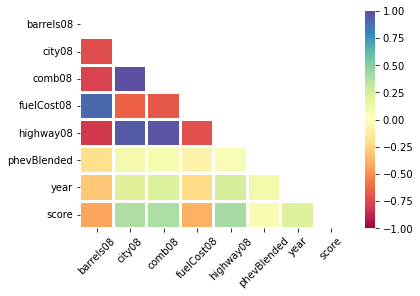

In [161]:
# Correlation heatmap
%matplotlib inline
ve_corr = ve_df.corr()
mask = np.zeros_like(ve_corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(ve_corr, cmap='Spectral', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2)

plt.yticks(rotation=0)
plt.xticks(rotation=45)

plt.savefig('correlation_heatmap.png', dpi=600, bbox_inches='tight')
plt.show()

From the correlation analysis, we see that barrels08 (annual petroleum consumption in barrels) shows the strongest correlation with emisisons score, whereas, phevBlended (hybrid car or not) shows the least correlation.Intriguingly, we observe that most of our selected variables exhibit a relatively high correlation (either positive or negative) with the emissions score.  

### 3.3.3 Distribution and Cross-Comparison Analysis

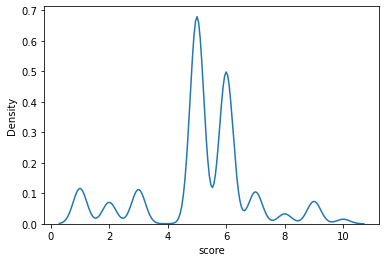

In [162]:
# Kernel density estimate
ax = sns.kdeplot(ve_df.score)

We see that score exhibits a multimodal distribution. 

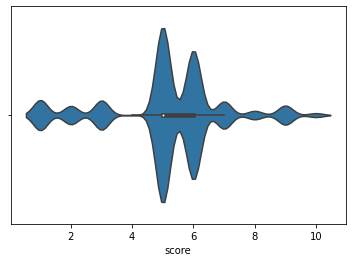

In [163]:
# violin plot
ax = sns.violinplot(x=ve_df.score)

The violinplot shows that the majority of the scores are either 5 or 6. 

<AxesSubplot:xlabel='score', ylabel='fuelType1'>

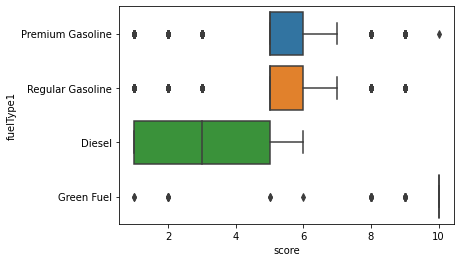

In [164]:
sns.boxplot(x='score', y='fuelType1', data=ve_df)

From the above boxplot, we see that Diesel cars have lower scores without any outliers. For Gasoline cars, the median score is 5. 

<AxesSubplot:xlabel='score', ylabel='year'>

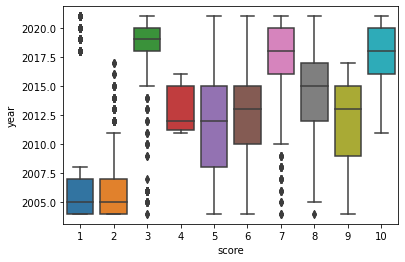

In [165]:
sns.boxplot(x='score', y='year', data=ve_df)

From this boxplot, we notice that as we move ahead with time, the emission scores increase. This is a realistic observation as newer car makes have better fuel efficiency and emissions standards. Therefore, we should treat year as a numeric variable and not categorical.

<AxesSubplot:xlabel='VClass', ylabel='score'>

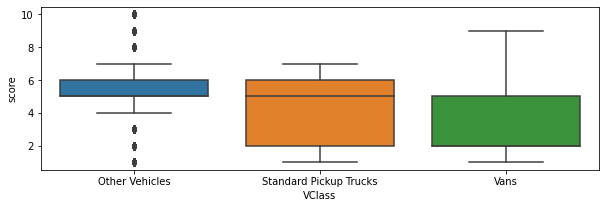

In [166]:
plt.rcParams["figure.figsize"] = (10,3)
sns.boxplot(x='VClass', y='score', data=ve_df)

We see that there is very little score variation between the vehicle classes. Thus, this variable can also be dropped.  

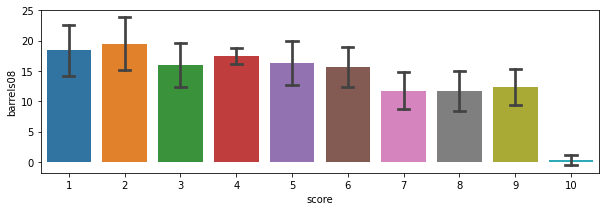

In [167]:
ax = sns.barplot(x="score", y="barrels08", ci='sd', data=ve_df, capsize=.2)

The score vs barrels08 barplot shows that the higher the score is, the annual fuel consumption (in barrels) is lower. Noticeably, green vehicles, have the least consumption. 

The correlation and distribution analysis suggests removing phevBlended and VClass.So, we remove them.

In [168]:
ve_df = ve_df.drop(columns=['phevBlended', 'VClass'])

### 3.3.4 Outlier detection using Boxplot rule

In [169]:
q1 = ve_df.score.quantile(0.25)
q3 = ve_df.score.quantile(0.75)

# Calculate the interquantile range (IQR)
IQR = q3 - q1
ll = q1 - 1.5 * IQR
ul = q3 + 1.5 * IQR

In [170]:
ll_outliers = ve_df.score < ll
ul_outliers = ve_df.score > ul
print('Lower limit outliers:', ll_outliers.sum())
print('Upper limit outliers:', ul_outliers.sum())
print('Total outliers:', ll_outliers.sum()  + ul_outliers.sum())

Lower limit outliers: 5015
Upper limit outliers: 2031
Total outliers: 7046


Although we detect 7046 outliers, we are not removing these at this moment. Since there are a sizeable number of outliers, removing them will reduce the data set size. We can use ensemble machine learning algorithms such as Random Forests which are somewhat robust to outliers. Later on, if we do no get satisfactory model performance, we can remove these outliers.

In [171]:
ve_df.to_csv('data/VE_Cleaned.csv', index=False)

### 3.3.5 Principal Component Analysis

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

In [173]:
ve_df = pd.read_csv('data/VE_Cleaned.csv')
ve_df.head()

,barrels08,city08,comb08,fuelCost08,fuelType1,highway08,year,score
0,18.311667,16.0,18.0,3200.0,Premium Gasoline,22.0,2004,1
1,15.695714,18.0,21.0,2750.0,Premium Gasoline,26.0,2004,1
2,15.695714,18.0,21.0,2750.0,Premium Gasoline,26.0,2004,1
3,15.695714,19.0,21.0,2750.0,Premium Gasoline,25.0,2004,1
4,15.695714,18.0,21.0,2750.0,Premium Gasoline,26.0,2004,1


#### Data Normalization

In [174]:
# Data normalization
robust_scaler = RobustScaler()
ve_norm_arr = robust_scaler.fit_transform(ve_df.loc[:, ve_df.columns != 'fuelType1'])
ve_norm_df = pd.DataFrame(ve_norm_arr)
ve_norm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,28556.0,-0.000854,0.816061,-3.049522,-0.489796,0.0,0.510204,4.081633
1,28556.0,0.213108,1.704423,-1.833333,-0.500000,0.0,0.500000,21.833333
2,28556.0,0.248414,1.367579,-1.714286,-0.428571,0.0,0.571429,17.285714
3,28556.0,-0.001009,0.824696,-2.411765,-0.529412,0.0,0.470588,4.647059
4,28556.0,0.128537,1.123043,-1.875000,-0.500000,0.0,0.500000,13.375000
5,28556.0,-0.053592,0.606328,-1.125000,-0.625000,0.0,0.375000,1.000000
6,28556.0,0.160527,1.823389,-4.000000,0.000000,0.0,1.000000,5.000000


#### Full-component PCA solution

In [175]:
# Fit linear Kernel
pca_linear = PCA(n_components=7)
pca_linear.fit(ve_norm_arr)

PCA(n_components=7)

In [176]:
#Cumulative Variance
var_pca = np.cumsum(np.round(pca_linear.explained_variance_ratio_, decimals=4) * 100)
print(var_pca)

[ 69.09  91.27  95.99  98.99  99.59  99.98 100.  ]


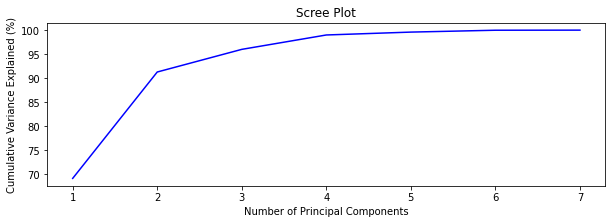

In [177]:
# Scree plot
var_pca = pd.DataFrame(var_pca, index=np.arange(1, 8))
plt.plot(var_pca, color='blue')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.savefig('scree_plot.png', dpi=600, bbox_inches='tight')

From the cummulative variance data and the screen plot obtained using linear PCA, we find that 3 components are sufficient to explain 96% of the variance. Therefore, 3 orthogonal (uncorrelated) components can keep more than 95% variance of the 7 variables in the original dataset. This implies we would be obtaining a good solution.

In [178]:
pca_linear = PCA(n_components=3)
ve_pca_transform_arr = pca_linear.fit_transform(ve_norm_arr)
ve_pca_transform_df = pd.DataFrame(ve_pca_transform_arr)
ve_pca_transform_df.columns = ['PC1', 'PC2', 'PC3']
ve_pca_transform_df.head(10)

,PC1,PC2,PC3
0,-3.078966,3.256219,0.326566
1,-2.244583,3.593229,-0.161929
2,-2.244583,3.593229,-0.161929
3,-2.195739,3.621737,-0.102962
4,-2.244583,3.593229,-0.161929
5,-2.196217,3.614991,-0.163369
6,-1.782508,2.710368,-0.070660
7,-2.534830,3.472266,-0.028479
8,-2.121121,2.567644,0.064230
9,-3.127811,3.227711,0.267599


In [179]:
ve_norm_df.corr()

,0,1,2,3,4,5,6
0,1.000000,-0.736932,-0.780911,0.910707,-0.818702,-0.294785,-0.425487
1,-0.736932,1.000000,0.993217,-0.648146,0.955490,0.225552,0.383834
2,-0.780911,0.993217,1.000000,-0.690899,0.980921,0.240110,0.396941
3,0.910707,-0.648146,-0.690899,1.000000,-0.726165,-0.216122,-0.385754
4,-0.818702,0.955490,0.980921,-0.726165,1.000000,0.252753,0.408956
5,-0.294785,0.225552,0.240110,-0.216122,0.252753,1.000000,0.231791
6,-0.425487,0.383834,0.396941,-0.385754,0.408956,0.231791,1.000000


In [180]:
ve_pca_transform_df.corr()

,PC1,PC2,PC3
PC1,1.000000e+00,1.245496e-15,-8.666262e-16
PC2,1.245496e-15,1.000000e+00,4.141852e-16
PC3,-8.666262e-16,4.141852e-16,1.000000e+00


When we compare the normalized data correlation and the PCA transformed correlation, we see that the principal components are almost uncorrelated with each other. Earlier, e.g, city08 (city MPG for fuelType1) had a high correlation with comb08 (combined MPG for fuelType1).

In [181]:
# PCA loadings
pd.DataFrame(pca_linear.components_.transpose(),
             index=ve_df.loc[:, ve_df.columns != 'fuelType1'].columns,
             columns=ve_pca_transform_df.columns)

,PC1,PC2,PC3
barrels08,-0.244742,-0.051528,0.571935
city08,0.583264,0.301618,0.345153
comb08,0.474396,0.233715,0.152760
fuelCost08,-0.223486,-0.043389,0.701621
highway08,0.386928,0.174093,-0.011527
year,0.063542,-0.034865,-0.171534
score,0.413709,-0.904623,0.092710


#### Visualizing PCA Components

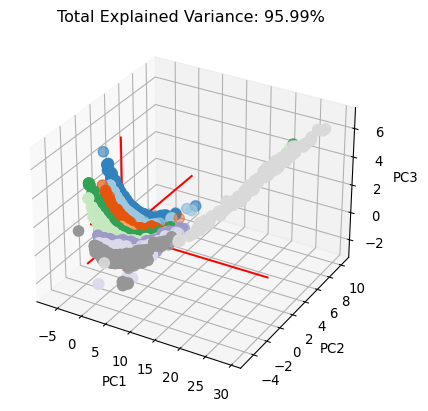

In [189]:
%matplotlib widget
%matplotlib inline

ve_df.score = pd.Categorical(ve_df.score)
score_color = ve_df.score.cat.codes
 
# Plot initialisation
fig = plt.figure(figsize=(480/96, 480/96), dpi=96)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ve_pca_transform_df['PC1'], ve_pca_transform_df['PC2'], ve_pca_transform_df['PC3'], 
           c=score_color, cmap="tab20c", s=60) 
# make simple, bare axis lines through space:
xAxisLine = ((min(ve_pca_transform_df['PC1']), max(ve_pca_transform_df['PC1'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(ve_pca_transform_df['PC2']), max(ve_pca_transform_df['PC2'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(ve_pca_transform_df['PC3']), max(ve_pca_transform_df['PC3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("Total Explained Variance: {:.2f}%".format(pca_linear.explained_variance_ratio_.sum() * 100))
plt.show()

Note that for PCA analysis, we leave out fuelType1 even though it is an important variable.

# 4. Predictive Modeling

## 4.1 Loading cleaned data

In [1]:
import pandas as pd

In [4]:
# Note that we are not using dimension reduced data sets from PCA or correlation analysis.
ve_df_all = pd.read_csv('data/Vehicle_Emissions.csv')
ve_df = pd.read_csv('data/VE_Cleaned.csv')
ve_df['VClass'] = ve_df_all['VClass'] # Getting original VClass

In [5]:
# Creating dummies

ve_df = pd.get_dummies(ve_df, columns=['fuelType1', 'VClass'])

In [7]:
ve_df.head()

,barrels08,city08,comb08,fuelCost08,highway08,year,score,fuelType1_Diesel,fuelType1_Green Fuel,fuelType1_Premium Gasoline,...,VClass_Sport Utility Vehicle - 2WD,VClass_Sport Utility Vehicle - 4WD,VClass_Standard Pickup Trucks 2WD,VClass_Standard Pickup Trucks 4WD,VClass_Standard Sport Utility Vehicle 2WD,VClass_Standard Sport Utility Vehicle 4WD,VClass_Subcompact Cars,VClass_Two Seaters,"VClass_Vans, Cargo Type","VClass_Vans, Passenger Type"
0,18.311667,16.0,18.0,3200.0,22.0,2004,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,15.695714,18.0,21.0,2750.0,26.0,2004,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,15.695714,18.0,21.0,2750.0,26.0,2004,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,15.695714,19.0,21.0,2750.0,25.0,2004,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,15.695714,18.0,21.0,2750.0,26.0,2004,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


## 4.2 Data splitting

In [8]:
from sklearn.model_selection import train_test_split

In [11]:
y = ve_df['score'].copy()
X = ve_df.drop(columns='score')

5     0.399005
6     0.292548
1     0.068217
3     0.066046
7     0.061493
9     0.043213
2     0.041357
8     0.019085
10    0.008825
4     0.000210
Name: score, dtype: float64

In [7]:
random_state = 0

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,
    random_state=random_state,
    stratify=y
)

## 4.3 Training and Test Data Normalization

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train.to_numpy())
X_test_norm = scaler.transform(X_test.to_numpy())

## 4.4 Model Tuning on Local System

### 4.4.1 Random Forests

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RepeatedKFold

In [12]:
from sklearn.metrics import make_scorer, cohen_kappa_score

score_avg = 'macro'
kappa_scorer = make_scorer(cohen_kappa_score)
scoring_metrics = {
    'f1_' + score_avg: 'f1_' + score_avg, 
    'precision_' + score_avg: 'precision_' + score_avg, 
    'recall_' + score_avg: 'recall_' + score_avg,
    'balanced_accuracy': 'balanced_accuracy',
    'kappa': kappa_scorer
}
scoring_metrics

{'f1_macro': 'f1_macro',
 'precision_macro': 'precision_macro',
 'recall_macro': 'recall_macro',
 'balanced_accuracy': 'balanced_accuracy',
 'kappa': make_scorer(cohen_kappa_score)}

In [361]:
param_dict = {
    'n_estimators': [500],
    'max_features': [5, 8],
    'max_depth': [None],
    'max_samples': [0.8],
    'min_samples_leaf': [1],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced'] #, 'balanced_subsample']
}
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=random_state)
model = RandomForestClassifier(n_jobs=-1, random_state=random_state)
model_grid = GridSearchCV(
    estimator=model, 
    param_grid=param_dict, 
    scoring=scoring_metrics, 
    n_jobs=-1, cv=cv, refit=scoring_metrics['f1_' + score_avg], 
    return_train_score=True
)

In [362]:
search_rf = model_grid.fit(X_train_norm, y_train)

In [13]:
# User defined function for computing model metrics

import numpy as np
from sklearn.metrics import roc_auc_score, balanced_accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score
from sklearn.metrics import classification_report

def calc_error_metrics(gs_obj, X_test, y_test, score_avg='macro'):
    """
    Calculate train, validation, test error metrics, and classification report (for the test data)
    :param gs_obj: Fitted GridSearchCV object
    :param X_test: X_test
    :param y_test: y_test
    :param score_avg: Scikit-learn scorer avergaging for multi-class classification
    :return Pandas dataframe containing the error metrics and classification report
    """
    
    # auc_list = []
    f1_list = []
    precision_list = []
    recall_list = []
    ba_list = []
    kappa_list = []
    search_data = ['mean_train', 'mean_test']
    scores = gs_obj.cv_results_
    for sd in search_data:
        # auc = scores['{}_roc_auc_{}'.format(sd, score_avg)].mean()
        f1 = scores['{}_f1_{}'.format(sd, score_avg)].mean()
        precision = scores['{}_precision_{}'.format(sd, score_avg)].mean()
        recall = scores['{}_recall_{}'.format(sd, score_avg)].mean()
        ba = scores['{}_balanced_accuracy'.format(sd)].mean()
        kappa = scores['{}_kappa'.format(sd)].mean()
        # auc_list.append(auc)
        f1_list.append(f1)
        precision_list.append(precision)
        recall_list.append(recall)
        ba_list.append(ba)
        kappa_list.append(kappa)
    best_model = gs_obj.best_estimator_
    y_pred = best_model.predict(X_test)
    # y_pred_proba = best_model.predict_proba(X_test)
    labels = np.unique(y_pred)
    # test_auc = roc_auc_score(y_test, y_pred, labels=labels, average=score_avg)
    test_f1 = f1_score(y_test, y_pred, labels=labels, average=score_avg)
    test_precision = precision_score(y_test, y_pred, labels=labels, average=score_avg)
    test_recall = recall_score(y_test, y_pred, labels=labels, average=score_avg)
    test_ba = balanced_accuracy_score(y_test, y_pred)
    test_kappa = cohen_kappa_score(y_test, y_pred, labels=labels)
    # auc_list.append(test_auc)
    f1_list.append(test_f1)
    precision_list.append(test_precision)
    recall_list.append(test_recall)
    ba_list.append(test_ba)
    kappa_list.append(test_kappa)
    results_dict = {
        'Data': ['Train', 'Validation', 'Test'],
        # 'ROC_AUC': auc_list,
        'F1 Score': f1_list,
        'Precision': precision_list,
        'Recall': recall_list,
        'Balanced Accuracy': ba_list,
        'Kappa Score': kappa_list
    }
    results_df = pd.DataFrame(data=results_dict)
    report = classification_report(y_test, y_pred, target_names=labels.astype(str), labels=labels)
    return results_df, report    

In [364]:
metrics_df, report = calc_error_metrics(search_rf, X_test_norm, y_test, score_avg)

In [365]:
metrics_df

,Data,F1 Score,Precision,Recall,Balanced Accuracy,Kappa Score
0,Train,0.777282,0.726165,0.869580,0.869580,0.671342
1,Validation,0.467633,0.449835,0.499578,0.509674,0.255996
2,Test,0.478083,0.447769,0.532153,0.532153,0.229528


In [366]:
print(report)

              precision    recall  f1-score   support

           1       0.56      0.61      0.59       584
           2       0.40      0.50      0.44       354
           3       0.65      0.68      0.67       566
           4       0.50      1.00      0.67         2
           5       0.47      0.40      0.43      3418
           6       0.36      0.34      0.35      2506
           7       0.35      0.42      0.38       527
           8       0.12      0.23      0.16       164
           9       0.09      0.14      0.11       370
          10       0.97      1.00      0.99        76

    accuracy                           0.41      8567
   macro avg       0.45      0.53      0.48      8567
weighted avg       0.43      0.41      0.42      8567



In [302]:
print(search_rf.best_params_)

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 5, 'max_samples': None, 'min_samples_leaf': 1, 'n_estimators': 500}


## 4.5 Model Tuning on the Missouri S&T Foundry HPC

We use Dask to perform model tuning on a distributed computing environment

### 4.5.1 LightGBM

In [ ]:
from dask_ml.model_selection import GridSearchCV as DaskGCV
from dask.distributed import Client
from dask_jobqueue import SLURMCluster
from lightgbm import LGBMClassifier

In [15]:
param_dict = {
    'boosting_type': ['gbdt'],
    'n_estimators': [300, 500],
    'max_depth': [10, 20, 30, -1],
    'max_bin': [127, 255],
    'min_data_in_bin': [3, 10, 20],
    'learning_rate': [0.05, 0.1],
    'subsample': [1, 0.8],
    'colsample_bytree': [1, 0.5],
    'colsample_bynode': [1],
    'path_smooth': [0, 0.1, 0.2],
    'num_leaves': [31, 63],
    'min_child_samples': [20],
}
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=random_state)

In [16]:
model = LGBMClassifier(
    tree_learner='feature', 
    class_weight='balanced',
    random_state=random_state,
    # deterministic=True, force_row_wise=True
)

In [16]:
cluster = SLURMCluster(
    cores=40,
    processes=1,
    memory="50G",
    walltime="02:00:00",
    interface='ib0',
    env_extra=['#SBATCH --out=IST-5520-Foundry-Dask-%j.out']
)
cluster.adapt(
    minimum=10, maximum=50,
    minimum_jobs=10, maximum_jobs=50,
    minimum_memory='40G', maximum_memory='50G'
)
dask_client = Client(cluster)
print('Waiting for dask workers...')
dask_client.wait_for_workers(10)

Waiting for dask workers...


In [18]:
model_grid = DaskGCV(
    estimator=model, 
    param_grid=param_dict, 
    scoring=scoring_metrics, 
    n_jobs=-1, cv=cv, 
    refit=scoring_metrics['f1_' + score_avg], 
    return_train_score=True
)

In [ ]:
search_dask_lgbm = model_grid.fit(X_train_norm, y_train)

In [21]:
metrics_df, report = calc_error_metrics(search_dask_lgbm, X_test_norm, y_test, score_avg)

In [22]:
metrics_df

,Data,F1 Score,Precision,Recall,Balanced Accuracy,Kappa Score
0,Train,0.702728,0.644762,0.839862,0.839862,0.540943
1,Validation,0.481861,0.452456,0.556968,0.568588,0.324939
2,Test,0.514768,0.471515,0.633385,0.633385,0.329062


In [23]:
print(report)

              precision    recall  f1-score   support

           1       0.50      0.66      0.57       584
           2       0.36      0.67      0.47       354
           3       0.55      0.81      0.65       566
           4       0.50      1.00      0.67         2
           5       0.64      0.30      0.41      3418
           6       0.49      0.47      0.48      2506
           7       0.39      0.54      0.45       527
           8       0.15      0.48      0.23       164
           9       0.15      0.41      0.22       370
          10       0.97      1.00      0.99        76

    accuracy                           0.45      8567
   macro avg       0.47      0.63      0.51      8567
weighted avg       0.53      0.45      0.46      8567



In [24]:
print(search_dask_lgbm.best_params_)

{'boosting_type': 'gbdt', 'colsample_bynode': 1, 'colsample_bytree': 1, 'learning_rate': 0.05, 'max_bin': 127, 'max_depth': 10, 'min_child_samples': 20, 'min_data_in_bin': 3, 'n_estimators': 300, 'num_leaves': 31, 'path_smooth': 0.2, 'subsample': 1}


In [240]:
dask_client.shutdown()

### 4.5.2 Random Forests 

In [232]:
param_dict = {
    'n_estimators': [300, 500],
    'max_features': [3, 5, 10, 20],
    'max_depth': [6, 10, None],
    'max_samples': [0.8, 0.5, 0.9, None],
    'min_samples_leaf': [1],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', 'balanced_subsample']
}
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=random_state)
model = RandomForestClassifier(
    n_jobs=-1, 
    random_state=random_state)
model_grid = DaskGCV(
    estimator=model, 
    param_grid=param_dict, 
    scoring=scoring_metrics, 
    n_jobs=-1, cv=cv, refit=scoring_metrics['f1_' + score_avg], 
    return_train_score=True
)


In [233]:
model_grid = DaskGCV(
    estimator=model, 
    param_grid=param_dict, 
    scoring=scoring_metrics, 
    n_jobs=-1, cv=cv, 
    refit=scoring_metrics['f1_' + score_avg], 
    return_train_score=True
)

In [234]:
search_rf = model_grid.fit(X_train_norm, y_train)

In [235]:
metrics_df, report = calc_error_metrics(search_rf, X_test_norm, y_test, score_avg)

In [236]:
metrics_df

,Data,F1 Score,Precision,Recall,Balanced Accuracy,Kappa Score
0,Train,0.578722,0.555383,0.714078,0.714078,0.422408
1,Validation,0.436231,0.426816,0.533302,0.547823,0.263565
2,Test,0.408527,0.398950,0.420700,0.420700,0.227434


In [237]:
print(report)

              precision    recall  f1-score   support

           1       0.57      0.61      0.59       584
           2       0.40      0.45      0.43       354
           3       0.66      0.69      0.67       566
           4       0.00      0.00      0.00         2
           5       0.47      0.43      0.45      3418
           6       0.35      0.35      0.35      2506
           7       0.37      0.39      0.38       527
           8       0.12      0.19      0.14       164
           9       0.08      0.09      0.08       370
          10       0.97      1.00      0.99        76

    accuracy                           0.42      8567
   macro avg       0.40      0.42      0.41      8567
weighted avg       0.43      0.42      0.42      8567



In [238]:
print(search_rf.best_params_)

{'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'max_samples': 0.5, 'min_samples_leaf': 1, 'n_estimators': 500}


### 4.5.3 Support Vector Machine

In [16]:
from sklearn.svm import SVC

In [17]:
param_dict = {
    'C': [0.5, 0.8, 1],
    'gamma': ['scale', 'auto', 0.8],
    'tol': [1e-3, 1e-2],
    'break_ties': [True, False]
}
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=random_state)
model = SVC(class_weight='balanced', random_state=random_state)
model_grid = DaskGCV(
    estimator=model, 
    param_grid=param_dict, 
    scoring=scoring_metrics, 
    n_jobs=-1, cv=cv, refit=scoring_metrics['f1_' + score_avg], 
    return_train_score=True
)

In [18]:
search_svm = model_grid.fit(X_train_norm, y_train)

In [19]:
metrics_df, report = calc_error_metrics(search_svm, X_test_norm, y_test, score_avg)

In [20]:
metrics_df

,Data,F1 Score,Precision,Recall,Balanced Accuracy,Kappa Score
0,Train,0.370993,0.365296,0.577352,0.577352,0.231768
1,Validation,0.356233,0.355257,0.511651,0.532175,0.220769
2,Test,0.399593,0.386629,0.578398,0.578398,0.250525


In [21]:
print(report)

              precision    recall  f1-score   support

           1       0.46      0.46      0.46       584
           2       0.24      0.75      0.36       354
           3       0.41      0.71      0.52       566
           4       0.13      1.00      0.24         2
           5       0.63      0.23      0.34      3418
           6       0.50      0.30      0.38      2506
           7       0.33      0.54      0.41       527
           8       0.06      0.37      0.10       164
           9       0.14      0.43      0.21       370
          10       0.97      1.00      0.99        76

    accuracy                           0.36      8567
   macro avg       0.39      0.58      0.40      8567
weighted avg       0.50      0.36      0.37      8567



In [23]:
print(search_svm.best_params_)

{'C': 1, 'break_ties': True, 'gamma': 0.8, 'tol': 0.01}


### 4.5.4 Extra Trees Classifier

In [29]:
from sklearn.ensemble import ExtraTreesClassifier

In [30]:
param_dict = {
    'n_estimators': [300, 500],
    'max_features': [3, 5, 7, 10],
    'max_depth': [6, 10, None],
    'max_samples': [0.8, 0.5, 0.9, None],
    'min_samples_leaf': [1],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', 'balanced_subsample']
}
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=random_state)
model = ExtraTreesClassifier(
    class_weight='balanced', 
    random_state=random_state,
    n_jobs=-1
)
model_grid = DaskGCV(
    estimator=model, 
    param_grid=param_dict, 
    scoring=scoring_metrics, 
    n_jobs=-1, cv=cv, refit=scoring_metrics['f1_' + score_avg], 
    return_train_score=True
)

In [31]:
search_et = model_grid.fit(X_train_norm, y_train)

In [32]:
metrics_df, report = calc_error_metrics(search_et, X_test_norm, y_test, score_avg)

In [33]:
metrics_df

,Data,F1 Score,Precision,Recall,Balanced Accuracy,Kappa Score
0,Train,0.533500,0.514130,0.709851,0.709851,0.401488
1,Validation,0.400826,0.395748,0.519259,0.537028,0.239507
2,Test,0.462869,0.428880,0.533174,0.533174,0.221032


In [34]:
print(report)

              precision    recall  f1-score   support

           1       0.55      0.61      0.58       584
           2       0.39      0.53      0.45       354
           3       0.62      0.67      0.64       566
           4       0.40      1.00      0.57         2
           5       0.46      0.36      0.40      3418
           6       0.36      0.36      0.36      2506
           7       0.34      0.40      0.37       527
           8       0.12      0.24      0.16       164
           9       0.10      0.16      0.12       370
          10       0.96      1.00      0.98        76

    accuracy                           0.40      8567
   macro avg       0.43      0.53      0.46      8567
weighted avg       0.42      0.40      0.40      8567



In [35]:
print(search_et.best_params_)

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'max_samples': 0.8, 'min_samples_leaf': 1, 'n_estimators': 300}


### 4.5.5 MLP Classifier

In [17]:
from sklearn.neural_network import MLPClassifier

In [18]:
param_dict = {
    'hidden_layer_sizes': [(512, 256), (256, 128, 64), (64, 32, 16, 8)],
    'learning_rate_init': [1e-3, 1e-2],
    'max_iter': [100, 200],
}
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=random_state)
model = MLPClassifier(random_state=random_state)
model_grid = DaskGCV(
    estimator=model, 
    param_grid=param_dict, 
    scoring=scoring_metrics, 
    n_jobs=-1, cv=cv, refit=scoring_metrics['f1_' + score_avg], 
    return_train_score=True
)

In [19]:
search_mlp = model_grid.fit(X_train_norm, y_train)

In [20]:
metrics_df, report = calc_error_metrics(search_mlp, X_test_norm, y_test, score_avg)

In [21]:
metrics_df

,Data,F1 Score,Precision,Recall,Balanced Accuracy,Kappa Score
0,Train,0.526306,0.590153,0.513441,0.513441,0.385971
1,Validation,0.450087,0.489226,0.445315,0.453457,0.324013
2,Test,0.483473,0.530263,0.476535,0.428881,0.326520


In [22]:
print(report)

              precision    recall  f1-score   support

           1       0.57      0.59      0.58       584
           2       0.49      0.38      0.43       354
           3       0.57      0.72      0.64       566
           5       0.52      0.67      0.59      3418
           6       0.48      0.38      0.43      2506
           7       0.53      0.37      0.43       527
           8       0.39      0.09      0.15       164
           9       0.25      0.09      0.13       370
          10       0.97      1.00      0.99        76

   micro avg       0.52      0.52      0.52      8565
   macro avg       0.53      0.48      0.48      8565
weighted avg       0.51      0.52      0.50      8565



In [23]:
print(search_mlp.best_params_)

{'hidden_layer_sizes': (512, 256), 'learning_rate_init': 0.001, 'max_iter': 100}


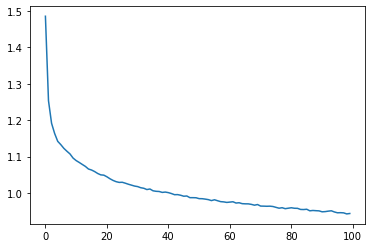

In [24]:
import matplotlib.pyplot as plt
plt.plot(search_mlp.best_estimator_.loss_curve_)
plt.show()

#### 4.5.6 Boosted Random Forests

In [17]:
param_dict = {
    'n_estimators': [300, 500],
    'max_depth': [10, 20, -1],
    'max_bin': [127, 255],
    'min_data_in_bin': [3, 10, 20],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.9, 0.5],
    'colsample_bytree': [1, 0.5],
    'colsample_bynode': [1],
    'path_smooth': [0, 0.1, 0.2],
    'num_leaves': [31, 63],
    'min_child_samples': [20],
}
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=random_state)
model = LGBMClassifier(
    boosting_type='rf',
    bagging_freq=1,
    class_weight='balanced', 
    random_state=random_state
)
model_grid = DaskGCV(
    estimator=model, 
    param_grid=param_dict, 
    scoring=scoring_metrics, 
    n_jobs=-1, cv=cv, refit=scoring_metrics['f1_' + score_avg], 
    return_train_score=True
)

In [18]:
search_brf = model_grid.fit(X_train_norm, y_train)

In [19]:
metrics_df, report = calc_error_metrics(search_brf, X_test_norm, y_test, score_avg)

In [20]:
metrics_df

,Data,F1 Score,Precision,Recall,Balanced Accuracy,Kappa Score
0,Train,0.457200,0.431045,0.675145,0.675145,0.331778
1,Validation,0.424028,0.404417,0.578920,0.602269,0.296177
2,Test,0.449043,0.417397,0.644578,0.644578,0.309786


In [21]:
print(report)

              precision    recall  f1-score   support

           1       0.46      0.62      0.53       584
           2       0.33      0.72      0.45       354
           3       0.49      0.80      0.60       566
           4       0.10      1.00      0.17         2
           5       0.64      0.26      0.37      3418
           6       0.49      0.43      0.46      2506
           7       0.38      0.50      0.43       527
           8       0.14      0.66      0.23       164
           9       0.18      0.46      0.26       370
          10       0.97      1.00      0.99        76

    accuracy                           0.43      8567
   macro avg       0.42      0.64      0.45      8567
weighted avg       0.52      0.43      0.43      8567



In [22]:
print(search_brf.best_params_)

{'colsample_bynode': 1, 'colsample_bytree': 1, 'learning_rate': 0.05, 'max_bin': 255, 'max_depth': -1, 'min_child_samples': 20, 'min_data_in_bin': 3, 'n_estimators': 500, 'num_leaves': 63, 'path_smooth': 0, 'subsample': 0.9}


### 4.5.7 Multinomial Logistic Regression

In [212]:
from sklearn.linear_model import LogisticRegression

In [213]:
y = ve_df['score'].copy()
X = ve_df.drop(columns='score')
X['const'] = 1

In [214]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,
    random_state=random_state,
    stratify=y
)

In [215]:
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train.to_numpy())
X_test_norm = scaler.transform(X_test.to_numpy())

In [216]:
from sklearn.model_selection import RepeatedKFold
param_dict = {
    'tol': [1e-4, 1e-3, 1e-2],
    'C': [0.5, 0.8, 1],
    'solver': ['saga', 'lbfgs'],
    'max_iter': [100, 200, 300, 500]
}
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=random_state)
model = LogisticRegression(
    class_weight='balanced', 
    random_state=random_state,
    multi_class='multinomial',
    n_jobs=-1
)
model_grid = DaskGCV(
    estimator=model, 
    param_grid=param_dict, 
    scoring=scoring_metrics, 
    n_jobs=-1, cv=cv, refit=scoring_metrics['f1_' + score_avg], 
    return_train_score=True
)

In [217]:
search_mlr = model_grid.fit(X_train_norm, y_train)

In [218]:
metrics_df, report = calc_error_metrics(search_mlr, X_test_norm, y_test, score_avg)

In [219]:
metrics_df

,Data,F1 Score,Precision,Recall,Balanced Accuracy,Kappa Score
0,Train,0.331403,0.329090,0.509821,0.509821,0.189551
1,Validation,0.326589,0.326447,0.469016,0.483657,0.183054
2,Test,0.346034,0.353011,0.454485,0.409037,0.161838


In [220]:
print(report)

              precision    recall  f1-score   support

           1       0.13      0.31      0.18       584
           2       0.25      0.61      0.35       354
           3       0.32      0.53      0.40       566
           5       0.49      0.19      0.27      3418
           6       0.51      0.19      0.28      2506
           7       0.32      0.35      0.33       527
           8       0.06      0.49      0.11       164
           9       0.14      0.42      0.21       370
          10       0.96      1.00      0.98        76

   micro avg       0.27      0.27      0.27      8565
   macro avg       0.35      0.45      0.35      8565
weighted avg       0.42      0.27      0.28      8565



In [221]:
print(search_mlr.best_params_)

{'C': 1, 'max_iter': 300, 'solver': 'saga', 'tol': 0.0001}


# 5. Final Model

## 5.1 Get Training and Test Data

In [1]:
import pandas as pd

In [2]:
# Note that we are not using dimension reduced data sets from PCA or correlation analysis.
ve_df_all = pd.read_csv('data/Vehicle_Emissions.csv')
ve_df = pd.read_csv('data/VE_Cleaned.csv')
ve_df['VClass'] = ve_df_all['VClass'] # Getting original VClass

In [3]:
# Creating dummies

ve_df = pd.get_dummies(ve_df, columns=['fuelType1', 'VClass'])

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
y = ve_df['score'].copy()
X = ve_df.drop(columns='score')

In [6]:
random_state = 0

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,
    random_state=random_state,
    stratify=y
)

In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train.to_numpy())
X_test_norm = scaler.transform(X_test.to_numpy())

## 5.1 Fitting with the best parameters

In [10]:
param_dict = {
    'boosting_type': 'gbdt', 
    'colsample_bynode': 1, 
    'colsample_bytree': 1, 
    'learning_rate': 0.05, 
    'max_bin': 127, 
    'max_depth': 10, 
    'min_child_samples': 20, 
    'min_data_in_bin': 3, 
    'n_estimators': 300, 
    'num_leaves': 31, 
    'path_smooth': 0.2, 
    'subsample': 1
}
random_state = 0
score_avg = 'macro'

In [11]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(
    tree_learner='feature', 
    class_weight='balanced',
    random_state=random_state,
)
model.set_params(**param_dict)

LGBMClassifier(class_weight='balanced', colsample_bynode=1, colsample_bytree=1,
               learning_rate=0.05, max_bin=127, max_depth=10, min_data_in_bin=3,
               n_estimators=300, path_smooth=0.2, random_state=0, subsample=1,
               tree_learner='feature')

In [12]:
model.fit(X_train_norm, y_train)

LGBMClassifier(class_weight='balanced', colsample_bynode=1, colsample_bytree=1,
               learning_rate=0.05, max_bin=127, max_depth=10, min_data_in_bin=3,
               n_estimators=300, path_smooth=0.2, random_state=0, subsample=1,
               tree_learner='feature')

<AxesSubplot:xlabel='Feature'>

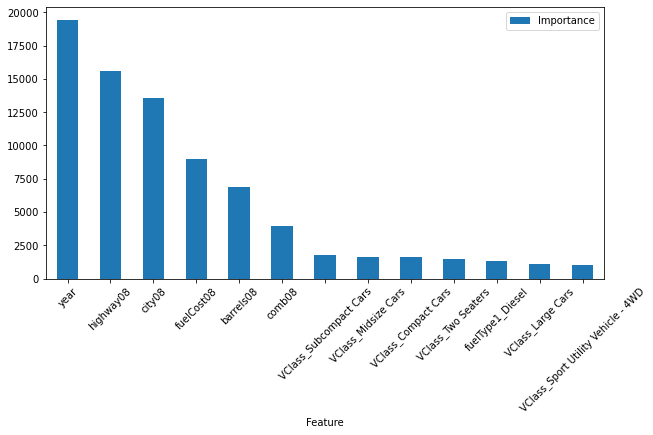

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

f_dict = {
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}
feature_df = pd.DataFrame(data=f_dict).sort_values(by='Importance', ascending=False)
feature_df = feature_df[feature_df.Importance >= 1000]
plt.rcParams["figure.figsize"] = (10, 5)
feature_df.set_index('Feature').plot.bar(rot=45)

## 5.2 Test Data Predictions

In [28]:
import numpy as np
from sklearn.metrics import roc_auc_score, balanced_accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_norm)
y_pred_proba = model.predict_proba(X_test)
labels = np.unique(y_pred)
test_auc = roc_auc_score(y_test, y_pred_proba, labels=labels, average=score_avg, multi_class='ovr')
test_f1 = f1_score(y_test, y_pred, labels=labels, average=score_avg)
test_precision = precision_score(y_test, y_pred, labels=labels, average=score_avg)
test_recall = recall_score(y_test, y_pred, labels=labels, average=score_avg)
test_ba = balanced_accuracy_score(y_test, y_pred)
test_kappa = cohen_kappa_score(y_test, y_pred, labels=labels)
results_dict = {
    'ROC_AUC': [test_auc],
    'F1 Score': [test_f1],
    'Precision': [test_precision],
    'Recall': [test_recall],
    'Balanced Accuracy': [test_ba],
    'Kappa Score': [test_kappa]
}
results_df = pd.DataFrame(data=results_dict)
report = classification_report(y_test, y_pred, target_names=labels.astype(str), labels=labels)

In [30]:
results_df.T

,0
ROC_AUC,0.622634
F1 Score,0.514768
Precision,0.471515
Recall,0.633385
Balanced Accuracy,0.633385
Kappa Score,0.329062


In [411]:
print(report)

              precision    recall  f1-score   support

           1       0.50      0.66      0.57       584
           2       0.36      0.67      0.47       354
           3       0.55      0.81      0.65       566
           4       0.50      1.00      0.67         2
           5       0.64      0.30      0.41      3418
           6       0.49      0.47      0.48      2506
           7       0.39      0.54      0.45       527
           8       0.15      0.48      0.23       164
           9       0.15      0.41      0.22       370
          10       0.97      1.00      0.99        76

    accuracy                           0.45      8567
   macro avg       0.47      0.63      0.51      8567
weighted avg       0.53      0.45      0.46      8567



In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

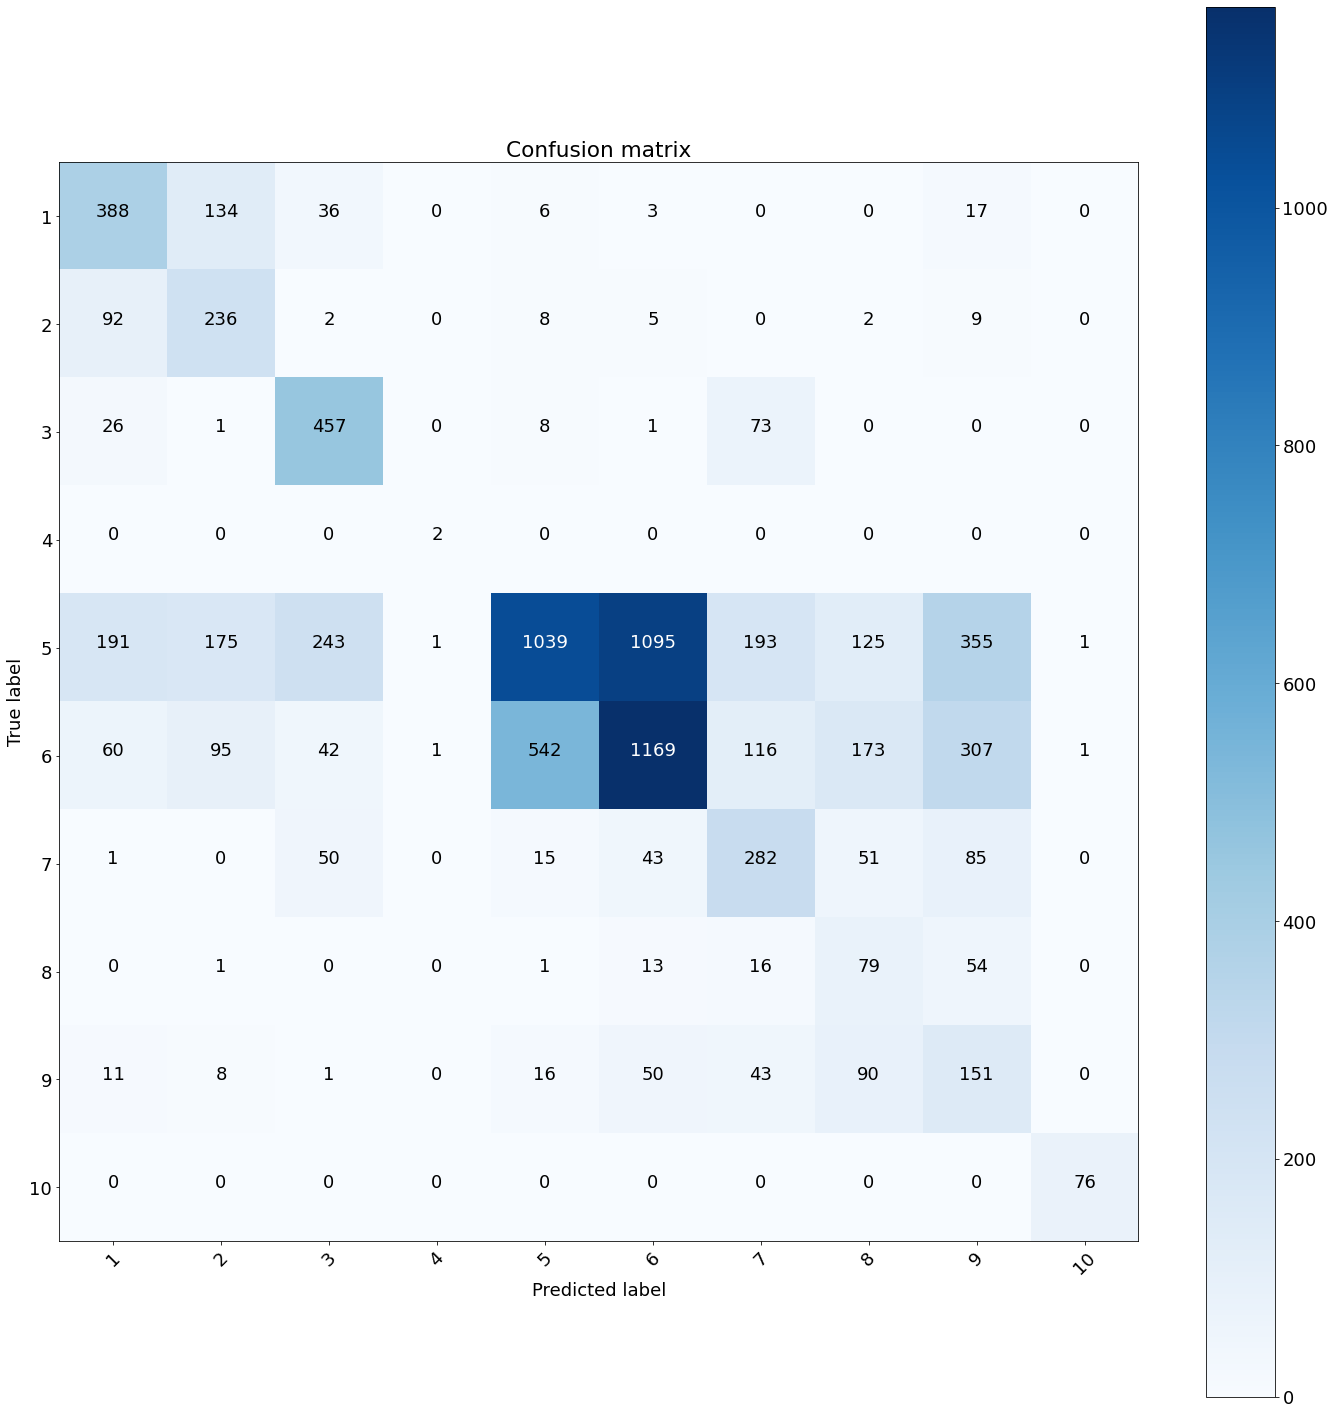

In [45]:
cnf_matrix = confusion_matrix(y_test, y_pred,labels=model.classes_)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.rcParams["figure.figsize"] = (20, 20)
plt.rcParams["font.size"] = 18
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=model.classes_)

# 6. Summary

We developed a machine learning-based predictive model to predict the vehicle emission score or smog rating (vehicle tailpipe CO2 emission) as defined by the Environmental Protection Agency (EPA). Essentially, the task is to perform a multi-class classification of the emission score, a discrete unitless integer quantity, varying from 1 (worst) to 10 (best). For this purpose, we collected the ‘vehicle’ and ‘emissions’ data sets from the EPA portal [1], [2]. 

As of now, the ‘vehicle’ and ‘emissions’ data contain around 44000 and 42000 records each with 83 and 8 features or columns, respectively. However, these data sets must be joined based on the vehicle id column which reduces the number of available observations because of missing ids. Moreover, the emission score had incorrect entries (negative scores) which were removed. Hence, after the data merging and cleaning steps, we had around 28000 observations. 

Thereafter, for categorical data transformation, we aggregated the fuelType1 column by combining midgrade and regular gasolines as 'Regular Gasoline' and 'Electricity' and 'Natural Gas' as 'Green Fuel'. Next, we performed correlation and distribution analysis, using which we were able to answer one of the sub research questions. We found that Standard Pickup Trucks and Vans (both cargo and passenger types) had the lowest emission scores in general. In addition, it was confirmed from boxplot analysis that, diesel vehicles received the lowest scores. 

An interesting observation from our boxplot outlier analysis was that all scores except those in the interval [4, 7] were marked as outliers. Hence, our initial choice of not performing outlier removal as part of the second milestone was justifiable. Similarly, we found principal component analysis (PCA) to be of not much use possibly because of strong non-linearity in the data set. We may need to apply kernel PCA-based approaches for appropriately investigating the benefits of PCA.

The final component of this project was the predictive modeling where we compared seven classification models. These are Multinomial Logistic Regression (MLR), Support Vector Machine (SVM), Gradient Boosting Trees (GBT), Random Forests (RF), Boosted Random Forests (BRF), Extremely Randomized Trees (ETR), and Multi-Layer Perceptron (MLP). For the GBT and BRF algorithms, we used the LightGBM [3] package and used scikit-learn for the rest. 

One issue with the given data set is extremely high class imbalance. For example, the EPA score 4 only has 6 samples (0.02%) in total while 40% of the total emission scores are marked as 5. Another potential problem was the data dimensionality (35 predictors in total including dummies from the VClass column). 

Therefore, we preferred using ensemble machine learning algorithms that support class weights as parameters and provide feature selection on the fly. Moreover, we only have 28000 observations, so going for deep learning models is overkill. 

In order to appropriately compare all the models, we scaled the features in the [0, 1] interval using MinMaxScaler. Next, to train the models, we initially used the scikit-learn GridSearchCV with RepeatedKFold having five-folds and a single repeat (we tried multiple repeats too, but the results were similar). Here, we could not use the stratified version because class 4 only had four observations in the training data. This was also a reason why we used 70-30 split of the training and test data. If we used 80% as training, then class 4 only had a single observation in the test data. 

The model evaluation was based on the similarity of the training and validation F1 score to reduce overfitting. We then checked the F1 for the test data. For additional interpretability, we also showed balanced accuracy, precision, recall, and the Cohen’s kappa score. Note that F1 was the metric that was optimized. For, F1, precision, and recall, we used the macro averaging as part of the GridSearch scoring metrics. In this context, we had NaN issues with the ROC AUC macro OVR (one-versus-rest) scoring metric through GridSearchCV. That is why we only show the ROC AUC for the test data of the final model.

While running the scikit-learn GridSearchCV with different hyperparameters of the ensemble learning algorithms and MLP on an Alienware M17 R1 (personal PC), we noticed that for many parameter values, even 8 hrs of computation was not sufficient. As a result, we switched to the Missouri S&T Foundry High-Performance Computing cluster and used Dask [4] to train our models in a distributed computing environment. This resulted in a significant reduction of computing time wherein we could tune several parameters in a very short time. For example, the GBM model training took around 6 hrs on the Alienware and took only 15 minutes using Dask.


Finally, we found that the GBM shown in section 5 has the best performance in terms of all the error metrics for the test data.

# References

[1]	EPA, “EPA Fuel Economy,” 2021. https://www.fueleconomy.gov/ (accessed Dec. 05, 2021).

[2]	EPA, “Fuel Economy Guide,” 2021. [Online]. Available: https://www.fueleconomy.gov/feg/pdfs/guides/FEG2021.pdf.

[3]	G. Ke et al., “LightGBM: A Highly Efficient Gradient Boosting Decision Tree,” in Advances in Neural Information Processing Systems, 2017, vol. 30, [Online]. Available: https://proceedings.neurips.cc/paper/2017/file/6449f44a102fde848669bdd9eb6b76fa-Paper.pdf.

[4]	M. Rocklin, “Dask: Parallel Computation with Blocked algorithms and Task Scheduling,” Proc. 14th Python Sci. Conf, 2015, Accessed: 29-Nov-2021. [Online]. Available: http://conference.scipy.org/proceedings/scipy2015/pdfs/matthew_rocklin.pdf.
